In [ ]:
# 데이터 분석 도구 소환 (수치 해석)
import numpy as np
# 데이터 분석 도구 소환 (data frame 다루게 해줌)
import pandas as pd
# 데이터 시각화 도구 소환
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅
# matplot gallery: https://matplotlib.org/gallery/index.html
plt.style.use('seaborn')
# plot font scale 고정
sns.set(font_scale=2.5)

# data set 에 채워지지 않은 null data 를 쉽게 보여줌
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 새로운 창 대신 노트북에 나오게 함
%matplotlib inline 

In [ ]:
# Step1_ data set 확인
# pandas -> python 에서 테이블로 되어 있는 데이터를 사용할 때 가장 최적화
# Add data 먼저 해라 제발
# 추가된 데이터 클릭해서 복붙 / Tab 누르면 하위 디렉토리 나옴
# 왜 파일 불러왔다고 밑에 안 뜨지
# 파일 불러오는 게 제일 어렵다 야발
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [ ]:
# 한 번 훑어볼까
df_train.head()

In [ ]:
# 각 feature 가 가진 통계치들을 반환 (mean, std, min, etc)
df_train.describe()

In [ ]:
df_test.describe()

In [ ]:
# 891 (세로: #passenger) * 12 (가로: feature) 로 나옴
df_train.shape

In [ ]:
df_train.columns

In [ ]:
# :> 오른쪽 정렬, :< 왼쪽 정렬, : 정렬 안 함, :. 소수점
for col in df_train.columns:
    msg='column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

In [ ]:
# 현재 선택된 column 알려줌
col
# column 값 전부 전달
df_train[col]
# pandas type 알려줌
# pandas 의 기본 객체는 series (index 와 value 로 이루어진 것), 여러 개 묶이면 data frame
type(df_train[col])

In [ ]:
# null 이냐? True: ㅇㅇ False: ㄴㄴ
# True 가 두 개 있다는 뜻 (null 값이 두 개 있다는 뜻)
df_train[col].isnull().sum()

In [ ]:
# shape : 차원을 반환해주는 함수
# 891 개의 row로 이루어짐
df_train['Embarked'].shape

In [ ]:
# null data percent
df_train[col].isnull().sum()/df_train[col].shape

In [ ]:
# esc 누르고 (cell 선택) f 누르면 (검색) = find and replace 특정 내용을 찾아서 바꾸기 가능
for col in df_test.columns:
    msg='column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

In [ ]:
# missing no 라는 library 로 matrix 를 만들어줌
# iloc index location 내가 원하는 row 나 column 또는 원하는 위치의 data 를 가져옴 (밑에 부가 설명)
# figsize =  figure size 전체 크기 조절
# color (R,G,B)
# null data 의 분포를 볼 수 있음 (빈칸이 null을 나타냄)
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

In [ ]:
# iloc [row,column]
# : 는 전체를 뜻함, 3: -> 3번째 부터
df_train.iloc[:,:]

In [ ]:
# 3-5 번째인데 왜 name 이랑 sex가 반환되었을까
# A: 3이상 5미만이므로 0,1,2,3,4,5 중에서 3,4번째에 해당하는 Name 과 Sex 가 반환됨
df_train.iloc[:,3:5]

In [ ]:
# percent 를 볼 수 있어서 편함
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

In [ ]:
# 여기서 부터 2번째 영상
# target label 이 어떤 distribution 을 가지고 있는 지 확인해야 함

# 도화지 준비, subplots(row,column) -> 1열에 그래프 2개 들어감
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [ ]:
# Count: Survived 의 개수 세어줌
df_train['Survived'].count
# value_counts: Survived 의 각 label 개수 세어줌 (0: 몇 개, 1: 몇 개)
df_train['Survived'].value_counts()

In [ ]:
# serires 라서 다양한 plot 만들 수 있음 -> series 가 무엇
df_train['Survived'].value_counts().plot()
df_train['Survived'].value_counts().plot.bar()
df_train['Survived'].value_counts().plot.pie()

In [ ]:
# eplode : 살짝 분리 시켜서 보여줌
# autopct : percent 로 보여줌
# ax 는  두 개임 (2행), 0 = 첫 번째 자리에 그린다는 뜻 (아래 확인)
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',shadow=True)
# 도화지의 첫 번째 부분에 제목을 달아줌
ax[0].set_title('Pie plot - Survived')
# y축 label 없애기
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

In [ ]:
ax

## 2.1 Pclass

In [ ]:
# count 는 각각의 sample 개수를 세어줌 (0,1 모두 포함)
# as_index = False 하면 어떻게 됨?
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

In [ ]:
# Survived 는 0,1 로 구분 -> sum 은 모두 더한 값, 즉 생존자 수를 나타냄
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

In [ ]:
# 진작에 이걸로 알려줬으면 됐잖아 야발...
# margins : All 이 있거나 없거나 차이
# https://matplotlib.org/examples/color/colormaps_reference.html
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

In [ ]:
# as_index = 'Pclass'를 index 로 두느냐 마느냐를 정함 (아래 비교 - plot 만들어보면 알 수 있음)
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

In [ ]:
 df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).count()

In [ ]:
# sort_values = 순서를 맞춰줌, ascending=False 하면 내림차순
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False)

In [ ]:
type(df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False))

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass',y=y_position)
ax[0].set_ylabel('Count')
# hue = 생존자, 사망자 구분 시켜서 보여줌
sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survied vs Dead',y=y_position)
plt.show()

## 2.2 Sex

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar()

In [ ]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

## 2.3 Both Sex and Pclass

In [ ]:
# sns.factorplot (x축, y축)
# aspect 가로 길이 조절?
# 각 점마다 있는 선 = error bar : 표본의 오차범위, 길수록 불확실
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)


In [ ]:
# saturation 블로그 오타 주의

sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=.5,size=9,aspect=1)

## Age

In [ ]:
# {} format 형식
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

In [ ]:
# max, min, mean 값 다 구할 수 있음
df_train['Age'].max()

In [ ]:
# 변수 선언
sibal = df_train['Age']

In [ ]:
# kdeplot = Kernel Density Estimator 확률밀도 : 아래의 histogram 을 부드러운 곡선으로 나타냄
# https://blog.naver.com/loiu870422/220660847923 참고하여 공부
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()

In [ ]:
df_train[df_train['Survived']==1]['Age'].hist()

In [ ]:
# indexing 하는 방법
#1
df_train.iloc[:,1]
#2
for row in df_train.iterrows():
    break

In [ ]:
row

In [ ]:
# 생존한 사람들의 데이터 중 'Age' column 만 가져와 series 를 반환
sns.kdeplot(df_train[df_train['Survived']==1]['Age'])
plt.show()

In [ ]:
# 도화지를 까는 다양한 방법
#1 f = plt.figure(figsize=(10,10))
#2 f.ax = plt.subplots(1,1,figsize=(10,10))
#3 plt.figure(figsize=(10,10))

In [ ]:
#1
f = plt.figure(figsize=(10,10))
a= np.arange(100)
b = np.sin(a)

plt.plot(b)

In [ ]:
#2
# ax = 축을 반환하기 때문에 ax.plot() 으로 해야 한다는데 plt.plot() 로 해도 반환됨
f,ax = plt.subplots(1,1,figsize=(10,10))
a= np.arange(100)
b = np.sin(a)

ax.plot(b)

In [ ]:
#3
plt.figure(figsize=(10,10))
a= np.arange(100)
b = np.sin(a)

plt.plot(b)

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

# plt 는 xlabel
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
a= np.arange(100)
b= np.sin(a)

ax.plot(b)
# ax 는 set_xlabel
ax.set_xlabel('sdf')

In [ ]:
# Pclass = 1 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('1st class')
plt.show()

In [ ]:
# Pclass = 2 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('2nd class')
plt.show()

In [ ]:
# Pclass = 3 인 사람들 중 나이대별 생존자
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'],ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'],ax=ax)
plt.legend(['Survived == 0','Survived == 1'])
plt.title('3rd class')
plt.show()

In [ ]:
# 나이에 음수값이 있는 이유는 histogram 을 스무스하게 표현하다 보니까 0에서 멈추지 않고 쭉 이어서 그림

In [ ]:
# age 의 ratio 를 다르게 했을 때 survival ratio 가 어떻게 변화하는가
change_age_range_survival_ratio = []
# 1살부터 80살까지 돌림
for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
# y=1.02 그래프에서 title 의 위치를 변경해줌
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [ ]:
change_age_range_survival_ratio = []

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

In [ ]:
i=10
df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived'])

In [ ]:
df_train[df_train['Age']<i]['Survived'].sum()

In [ ]:
len(df_train[df_train['Age']<i]['Survived'])

## Pclass, Sex, Age

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
# split = false 하면 0,1 따로 나눠서 보여줌
# scale = area 이면 0 과 1의 분포 차이를 잘 보여줌, count 는 0,1의 수적인 차이를 잘 보여줌 (seaborn 사이트 참고)
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
# tick (0,110,10) 에서 10은 나이를 10 단위로 끊어줌
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Embarked

In [ ]:
# sort_values 가 무엇일까
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [ ]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived',ascending=False)

In [ ]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_index()

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
# f,ax=plt.subplots(1,2),ax[0],ax[1] -> 1차원 / 아래는 2차원이라서 행렬 나타내듯이 [0,0] 넣어줌 (?) 개소리지...
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

# 좌우, 상하 간격 맞춰줌
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Family - SibSp + Parch

In [ ]:
# 자신을 포함해야 해서 + 1 함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 

In [ ]:
print('Maximum size of Family:',df_train['FamilySize'].max())
print('Minimum size of Family:',df_train['FamilySize'].min())

In [ ]:
# pandas series 끼리 사칙연산이 가능함
df_train['SibSp']*df_train['Parch']
df_train['SibSp']/df_train['Parch']

In [ ]:
f, ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1)No.Of Passenger Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2)Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Fare

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# skewness : distribution 이 얼마나 쏠려있는가, 좌측으로 치우치면 양수, 우측: 음수
# high skewness -> 모델이 잘못 학습될 수 있음
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
# testset 에 있는 nan value 를 평균값으로 치환함
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# lambda 함수 -> Fare colums 의 데이터 모두를 log 값 취하기
# map 에 인수로 넣어주면 Fare columns 데이터에 그대로 적용 가능
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin

In [ ]:
df_train.head()

In [ ]:
df_train['Ticket'].value_counts()

In [ ]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

 ## 3. Feature engineering

## 3.1 Fill Null

In [ ]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

In [ ]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [ ]:
df_train.groupby('Initial').mean()

In [ ]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [ ]:
df_train.groupby('Initial').mean()

In [ ]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [ ]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

In [ ]:
df_train['Embarked'].fillna('S', inplace=True)

In [ ]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [ ]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

In [ ]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

## 3.3 Change Initial, Embarked and Sex （string to numerical)

In [160]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [161]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [162]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [163]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [164]:
df_train['Embarked'].isnull().any()

False

In [165]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

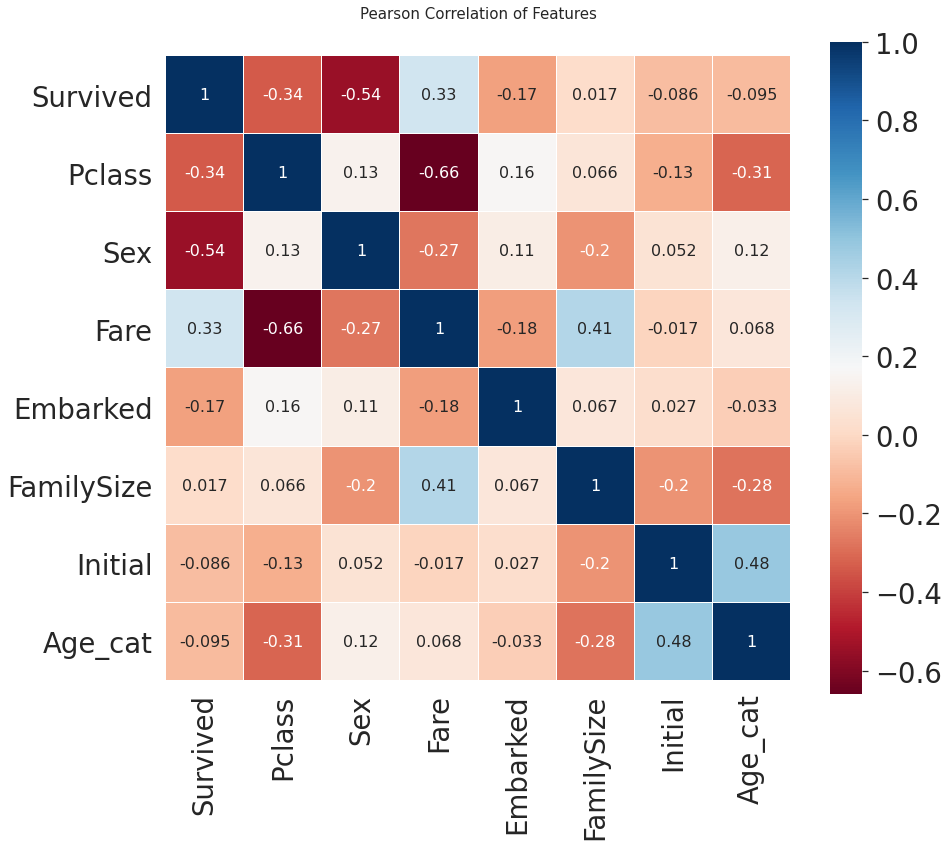

In [166]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [167]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [168]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0.683603,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1.450832,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,0.727559,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1.379314,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0.735091,NaN,2,1,3,0,0,1,0,0


In [169]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 3.5 Drop columns

In [170]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [171]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,0.683603,2,2,0,0,1,0,0,0,0,1
1,1,1,0,1.450832,2,3,0,0,0,1,0,1,0,0
2,1,3,0,0.727559,1,2,0,1,0,0,0,0,0,1
3,1,1,0,1.379314,2,3,0,0,0,1,0,0,0,1
4,0,3,1,0.735091,1,3,0,0,1,0,0,0,0,1


In [172]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,0.721667,1,3,0,0,1,0,0,0,1,0
1,3,0,0.665730,2,4,0,0,0,1,0,0,0,1
2,2,1,0.820148,1,6,0,0,1,0,0,0,1,0
3,3,1,0.769647,1,2,0,0,1,0,0,0,0,1
4,3,0,0.919718,3,2,0,0,0,1,0,0,0,1


## 4 Building machine learning model and prediction using the trained model

In [173]:
# randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
# 모델의 평가
from sklearn import metrics
# training set 을 쉽게 나눠주는 함수
from sklearn.model_selection import train_test_split

## 4.1 Preparation - Split dataset into train, valid, test set

In [174]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [175]:
# 머신러닝 알고리즘 종류 참고 http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 4.2 Model generation and prediction

In [176]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [177]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


## 4.3 Feature importance

In [178]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

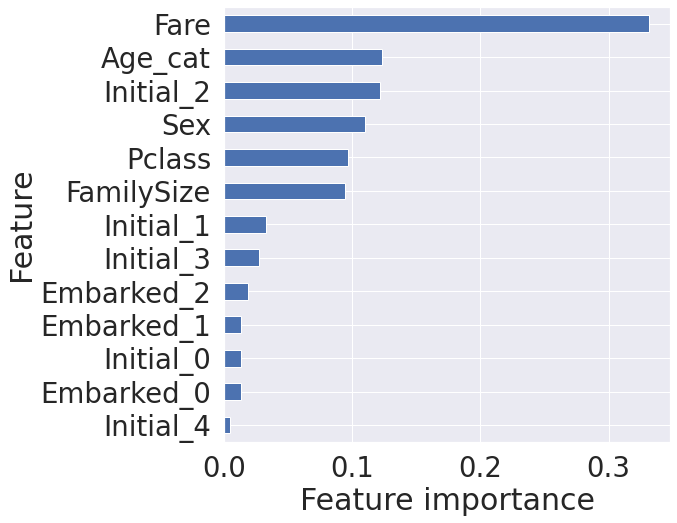

In [179]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set

In [182]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [183]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [184]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [ ]:
submission.to_csv('./my_first_submission.csv', index=False)